Introduction:

Our group was trying to figure out the "best neighborhood for families to avoid" in Pittsburgh.

The submteric I chose to use was a Traffic Count dataset from the City of Pittsburgh. 

I wanted to use my dataset to find out what neighborhoods families might want to avoid that high numbers in traffic if they have children etc.

Metric:
    
I measured 2 features from the Traffic Count Dataset "Average Daily Car Traffic" and "Percent Over Speed Limit"
within the neighborhoods of the dataset.

I wanted to see which neighborhoods had the highest traffic rates and percent over the limit. 


importing pandas and dataset

In [2]:
import pandas as pd

project = pd.read_csv("Traffic.csv")
project.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,4/18/2019,4/26/2019,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,6-Feb
1,1026101993,140,1.121444e+09,1/24/2019,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,6-Mar
2,1032382575,11,1.539893e+09,8/28/2018,9/4/2018,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,16-Jan
3,103627606,9,7.341951e+08,7/17/2018,8/1/2018,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,18-Feb
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,15-Jan


In [4]:
import pandas as pd
import geopandas
%matplotlib inline

First I imported the dataset and filtered to find the avg daily car traffic for the neighborhoods. 
I used the .sort_values function to have the neighborhoods go from highest avg daily car traffic to lowest.

Note: The origin of this dataset was based on counters that were placed in part of the traffic 
      study to see whether or not to install speed bumps in the neighborhoods. Since some of the neighborhoods
      did not have counters some areas were not evaluated, which could show some data abnormalities.

In [5]:
# import dataset
avgtraffic = pd.read_csv("Traffic.csv")
# filter to important info
daily_traffic = avgtraffic.groupby("neighborhood").sum()['average_daily_car_traffic']
daily_traffic.sort_values(ascending=False)

neighborhood
Squirrel Hill South    79302.0
Shadyside              66132.0
East Liberty           51247.0
Mount Washington       47336.0
Bloomfield             43101.0
                        ...   
Upper Lawrenceville        0.0
Banksville                 0.0
South Oakland              0.0
Crawford-Roberts           0.0
Middle Hill                0.0
Name: average_daily_car_traffic, Length: 74, dtype: float64






Then, I read in the shapefile that contains the neighborhoods and then plotted the geopandas dataframe.

A map of Pittsburgh is shown below!

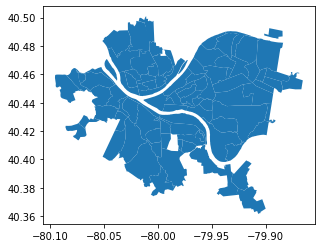

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Next, I merged the avgtraffic dataframe with the map dataframe to have the map represent the traffic data. 

I merged daily_traffic with neighborhoods to create a new geopandas dataframe, which I named traffic_map.

In [61]:
# do the merge
traffic_map = neighborhoods.merge(daily_traffic, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
traffic_map[['hood','average_daily_car_traffic','geometry']].head()

,hood,average_daily_car_traffic,geometry
0,Central Oakland,11306.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,23821.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2585.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,0.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,29075.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


Now each neighborhood has its own daily car traffic count.

I specified which column from the traffic dataset I needed to plot --> average_daily_car_traffic

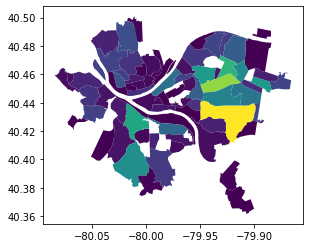

In [62]:
# draw a choropleth map using data from the column named "average_daily_car_traffic"
traffic_map.plot(column='average_daily_car_traffic')

Now I need to make it clear which neighborhoods have what amount of daily traffic.

The map below shows each neighborhood. 

The darkest red have the most daily car traffic and the gray areas have no data, which was explained above due to not have a counter located in that neighborhood.

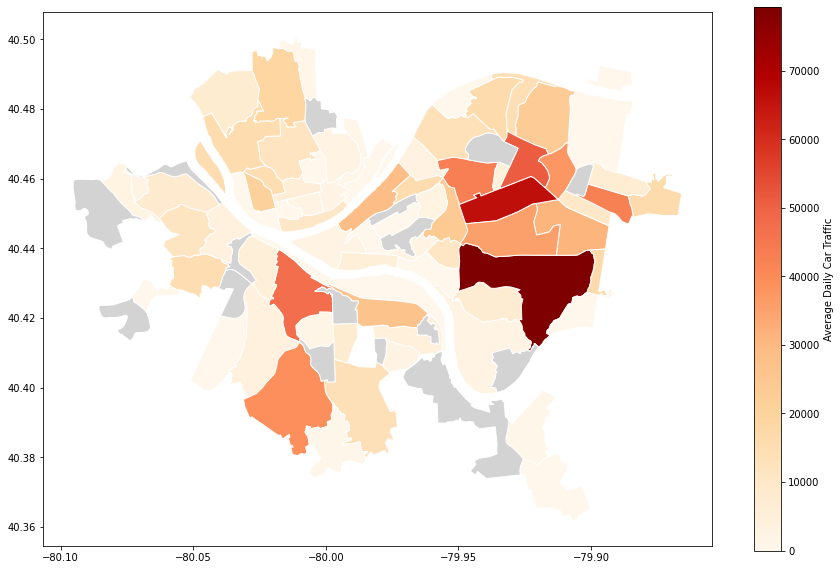

In [63]:
traffic_map.plot(column='average_daily_car_traffic', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Average Daily Car Traffic"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

The top 5 neighborhoods that had the most daily car traffic is as follows:
    
1) Squirrel Hill South    79302.0

2) Shadyside              66132.0

3) East Liberty           51247.0

4) Mount Washington       47336.0

5) Bloomfield             43101.0

I did the same exact steps with the second column of data I wanted to measure, which was Percent Over Limit and created a map of this data in each neighborhood.

In [37]:

# import dataset
limit = pd.read_csv("Traffic.csv")
# filter to important info
over_limit = limit.groupby("neighborhood").sum()['percent_over_limit']
over_limit.sort_values(ascending=False)

neighborhood
Squirrel Hill South    1397.0
Shadyside               661.0
Mount Washington        602.0
East Liberty            525.0
Larimer                 439.0
                        ...  
Oakwood                   0.0
South Oakland             0.0
South Shore               0.0
Crawford-Roberts          0.0
Chateau                   0.0
Name: percent_over_limit, Length: 74, dtype: float64

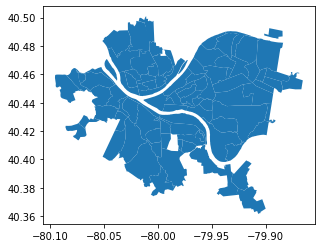

In [3]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [27]:
# do the merge
traffic_map1 = neighborhoods.merge(over_limit, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
traffic_map1[['hood','percent_over_limit','geometry']].head()

,hood,percent_over_limit,geometry
0,Central Oakland,77.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,117.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,28.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,0.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,181.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


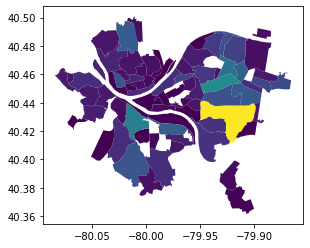

In [24]:
# draw a choropleth map using data from the column named "percent_over_limit"
traffic_map1.plot(column='percent_over_limit')

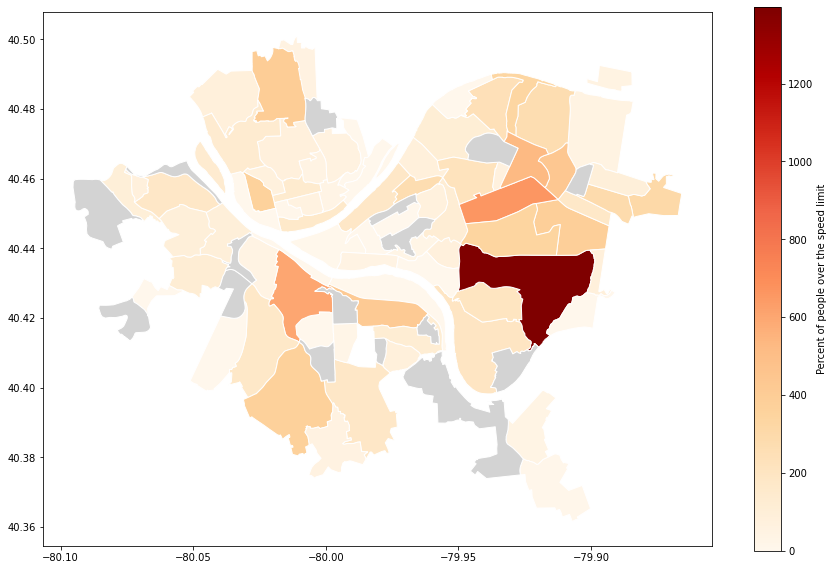

In [30]:
traffic_map1.plot(column='percent_over_limit', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Percent of people over the speed limit"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

The top 5 neighborhoods that had the most cars over the speed limit is as follows:


1) Squirrel Hill South    1397.0

2) Shadyside               661.0

3) Mount Washington        602.0

4) East Liberty            525.0

5) Larimer                 439.0

Lastly, to display the two categories of data together ( Average Daily Car Traffic & Percent Over Speed Limit) 
I created a stacked bar graph.

I merged the sum of daily car traffic with the sum of percent over limit that was used before, and then
graphed it.


                     average_daily_car_traffic  percent_over_limit
neighborhood                                                      
Squirrel Hill South                    79302.0              1397.0
Shadyside                              66132.0               661.0
East Liberty                           51247.0               525.0
Mount Washington                       47336.0               602.0
Bloomfield                             43101.0               221.0
...                                        ...                 ...
Upper Lawrenceville                        0.0                 0.0
Banksville                                 0.0                 0.0
South Oakland                              0.0                 0.0
Crawford-Roberts                           0.0                 0.0
Middle Hill                                0.0                 0.0

[74 rows x 2 columns]


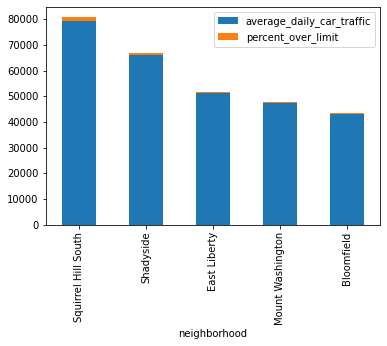

In [74]:


daily_traffic = avgtraffic.groupby("neighborhood").sum()['average_daily_car_traffic']
daily_traffic = daily_traffic.sort_values(ascending=False)

over_limit = limit.groupby("neighborhood").sum()['percent_over_limit']
over_limit = over_limit.sort_values(ascending=False)

# do the merge
smaller_set = avgtraffic.merge(daily_traffic, how='left', left_on='neighborhood', right_on='neighborhood')


limit = limit[['neighborhood', 'percent_over_limit']]
smaller_set = pd.merge(daily_traffic, over_limit, right_index=True, left_index =True)
##smaller_set = limit.merge(daily_traffic, how='left', left_on='neighborhood', right_on='neighborhood')
##smaller_set = smaller_set.head()
print(smaller_set)

# look at the head to confirm it merged correctly
##smaller_set[['neighborhood','percent_over_limit']].head()
smaller_set = smaller_set.head()
##print (daily_traffic.head(5))
smaller_set.plot.bar(stacked=True)


From these findings the top 5 least fitted neighborhoods for families are ranked as follows:
   
    1) Squirrel Hill South
    
    2) Shadyside
    
    3) East Liberty
    
    4) Mount Washington
    
    5) Bloomfield